In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
from skimage import data
from skimage import io
from skimage.color import rgb2gray

In [15]:
def savefig_rename(fig, dst):
    os.makedirs(os.path.split(dst)[0], exist_ok=True)
    basename, ext = os.path.splitext(dst)
    if os.path.exists(dst):
        fig.savefig(dst, bbox_inches="tight", pad_inches=.4)
    else:
        ii=1
        while True:
            new_name = basename + "_" + str(ii) + ext
            if not os.path.exists(new_name):
                fig.savefig(new_name, bbox_inches="tight", pad_inches=.4)
                break
            else:
                ii += 1


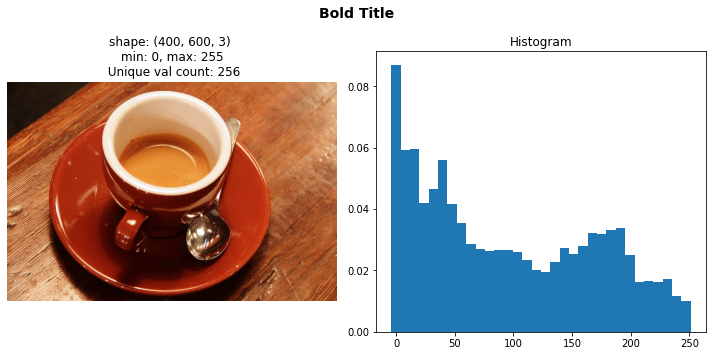

In [21]:
def show_img(img, cmap=None, histogram=False, 
             save=False, save_dir="./", 
             title=None, bold_title="Bold Title"):
    
    if title is None:
        title = f"shape: {img.shape} \n min: {img.min()}, max: {img.max()} \n Unique val count: {len(np.unique(img))}"
    
    if histogram:
        fig, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 1], 'height_ratios':[1]}, figsize=(10,5))
    else:
        fig = plt.figure()
        ax = fig.add_subplot()
        fig.subplots_adjust(top=0.85)
    
    # Set titles for the figure and the subplot respectively
    fig.suptitle(bold_title, fontsize=14, fontweight='bold')
    
    
    if histogram:
        ax1.set_title(title)
        ax1.imshow(img, cmap=cmap)
        ax1.axis('off')
        
        ax2.set_title("Histogram")
        # create histogram
        N=32 # bin count
        bins = np.linspace(0, 255, N+1)
        histogram, bin_edges = np.histogram(img.flatten(), bins=bins)
        ax2.bar(bin_edges[:-1], 1.0*histogram/sum(histogram), width=np.diff(bin_edges)[0] )
    
    else:
        ax.set_title(title)
        ax.imshow(img, cmap=cmap)
        ax.axis('off')
    
    fig.tight_layout()
    if save:
        #plt.savefig(f"{bold_title}.jpg", bbox_inches="tight",pad_inches=.4)
        dst = os.path.join(save_dir, f"{bold_title}.jpg")
        savefig_rename(fig, dst=dst)
    
    plt.show()

show_img(data.coffee(), histogram=True)

## 2.1

8 bit bir resmi, 
* TH=127 ile, 
* ortalama alarak ve 
* medyan alarak 
siyah beyaza çevirip gösterin. (bknz aşağıdaki şekil 2.1). 

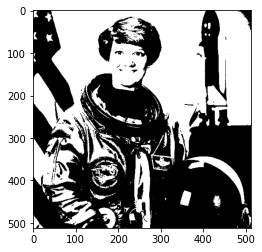

In [40]:
def threshold_img(img, method="mean"):
    if isinstance(method, int):
        th_value = method
    elif method == "mean":
        th_value = img.mean()
    elif method == "median":
        th_value = np.median(img)
    
    return (img > th_value)*255

img = (rgb2gray(data.astronaut()) * 255).astype(np.uint8)
plt.imshow(threshold_img(img, method=127), cmap="gray")

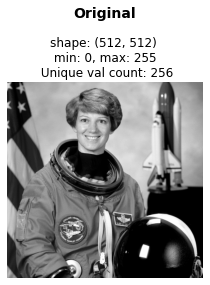

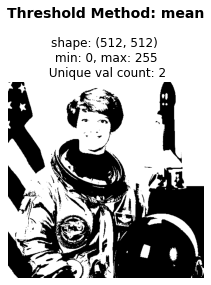

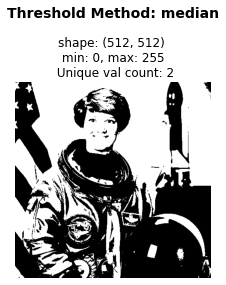

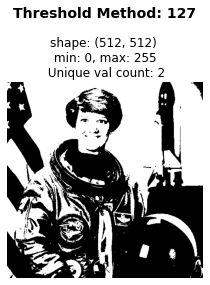

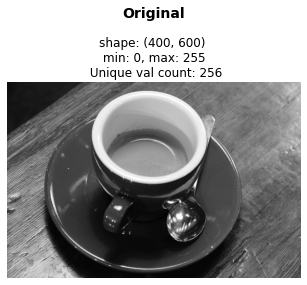

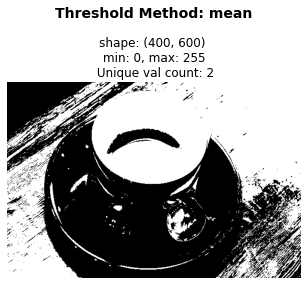

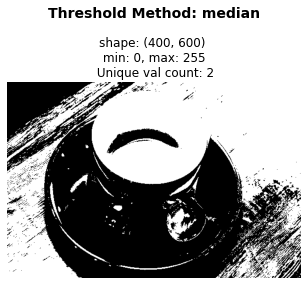

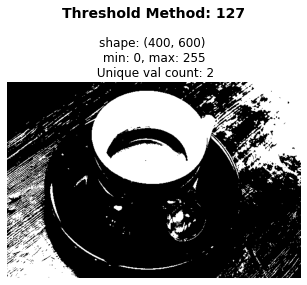

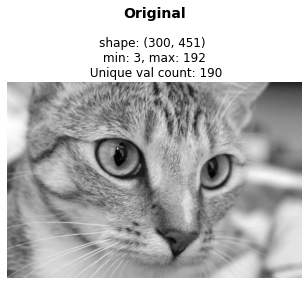

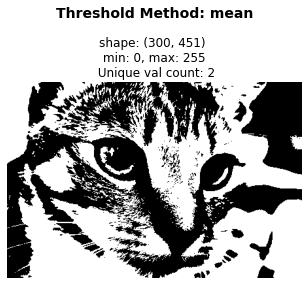

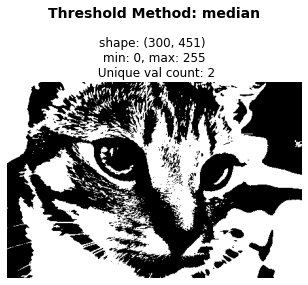

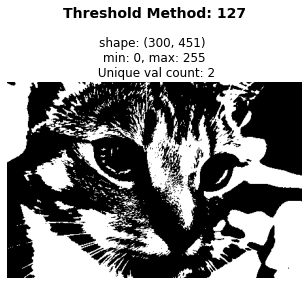

In [42]:
test_images = [data.astronaut(), data.coffee(), data.chelsea()]

methods = ["mean", "median", 127]
for img in test_images:
    img = (rgb2gray(img) * 255).astype(np.uint8)
    show_img(img, 
             bold_title="Original", 
             save=True, save_dir="./2.1", 
             cmap="gray")

    for method in methods:
        out_img = threshold_img(img, method=method)
        show_img(out_img, bold_title=f"Threshold Method: {method}", 
                 save=True, save_dir="./2.1", 
                 cmap="gray")


## 2.2  
8 bit bir resmi şekilde gösterildiği gibi orjinal, 
* gamma 2 ve 
* gamma 0.5 
ile dönüşmüş versiyonlarını ve karşılık gelen histogramlarını gösteriniz. (bknz aşağıdaki şekil 2.2). 


In [8]:
def adjust_gamma(image, gamma=1.0):
	# build a lookup table mapping the pixel values [0, 255] to
	# their adjusted gamma values
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
	# apply gamma correction using the lookup table
	return np.take(table, image)


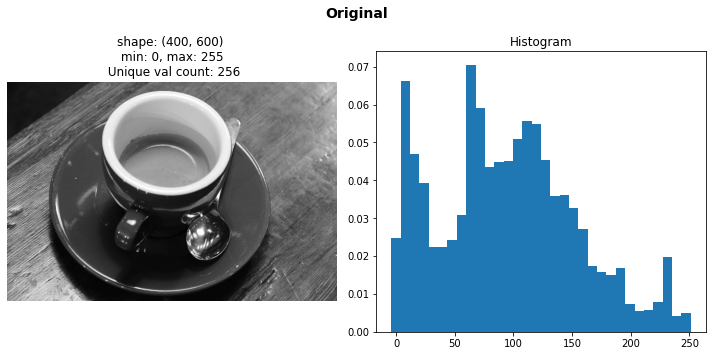

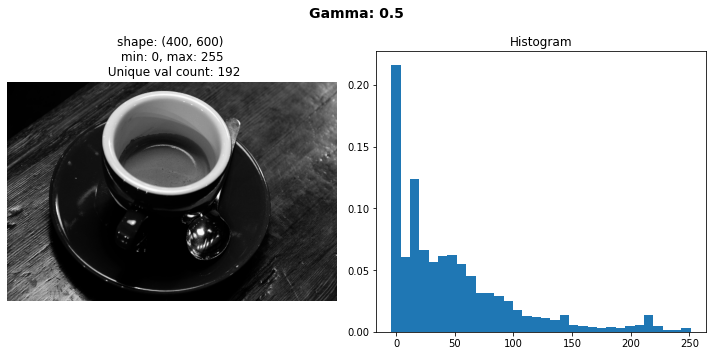

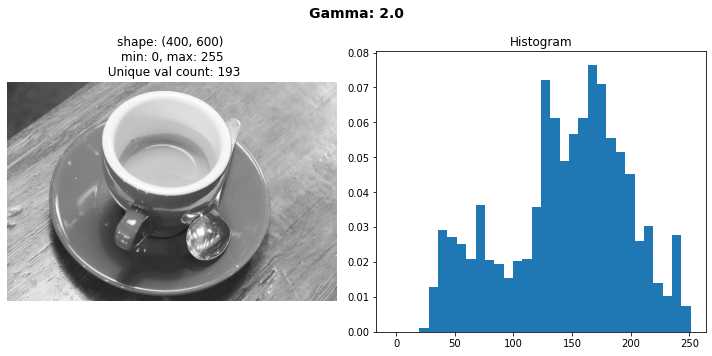

In [46]:
img = (rgb2gray(data.coffee()) * 255).astype(np.uint8)
gammas = [0.5, 2.0]

show_img(img, cmap="gray",
         bold_title="Original", 
        save=True, save_dir="./2.2",
        histogram=True)
for gamma in gammas:
    img_gamma = adjust_gamma(img, gamma=gamma)
    show_img(img_gamma, cmap="gray",
             bold_title=f"Gamma: {gamma}", 
             save=True, save_dir="./2.2",
             histogram=True)
    

## 2.3) (BONUS artı 10 puan) 
Dar kontrastlı bir imgeyi derste anlatılan lineer dönüşümie kontrastını arttırın. 
Histogram ve imgelerin önceki ve sonraki hallerini gösterin (bknz aşağıdaki şekil 2.3). 

In [50]:
def contrast_stretch(img):
    out = (img-img.min())/(img.max()-img.min())
    return ((out) * 255).astype(np.uint8) 

(511, 511, 3)


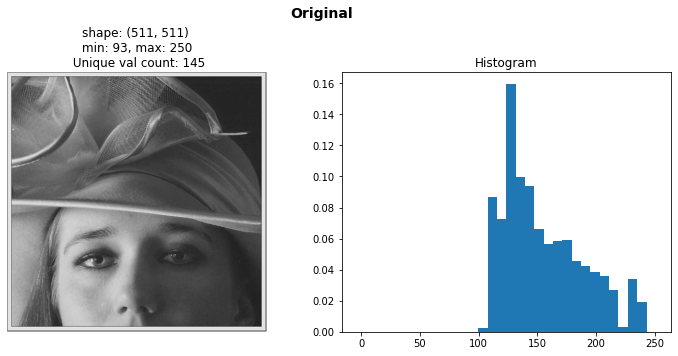

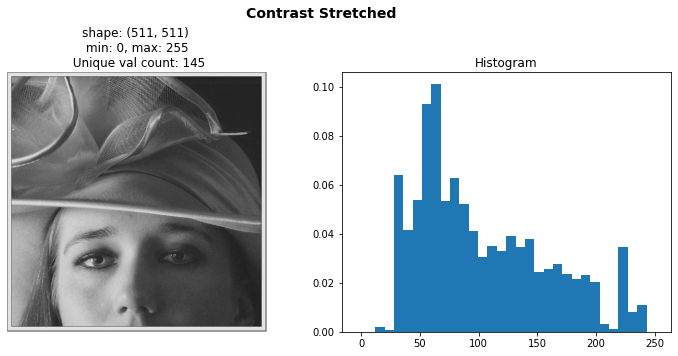

In [55]:
img_url = "https://wiki.cuvilib.com/images/3/36/Eqbefore.jpg"
img = img = io.imread(img_url)
print(img.shape)
img = (rgb2gray(img) * 255).astype(np.uint8)

img_contrast_stretched = contrast_stretch(img)

show_img(img, cmap="gray",
         bold_title="Original", 
        save=True, save_dir="./2.3",
        histogram=True)

show_img(img_contrast_stretched, cmap="gray",
         bold_title=f"Contrast Stretched", 
         save=True, save_dir="./2.3",
         histogram=True)
